# Digital PD Control System with ONE EXTRA DELAY

考虑如下单自由度系统

![单自由度质量块](images/2023-04-10-15-14-41.png)

物体的动力学方程为：

$$
\ddot{x} = - \frac{k_{p}}{m} \left. x \right |_{t=(n-1) \tau} - \frac{k_{d}}{m} \left. \dot{x} \right |_{t=(n-1) \tau}, \qquad t \in [n\tau, (n+1)\tau),n \in \mathbb{N},
$$


令$T=\frac{t}{\tau}$，则有：

$$
\begin{aligned}
    \frac{d}{dt} &= \frac{d}{dT} \frac{dT}{dt} = \frac{1}{\tau} \frac{d}{dT}, \\
    \frac{d^{2}}{dt^{2}} &= \frac{1}{\tau} \frac{d}{dT} \bigg(\frac{1}{\tau} \frac{d}{dT} \bigg) = \frac{1}{\tau^2} \frac{d^2}{dT^{2}}.
\end{aligned}
$$


由于，

$$
n = \left \lfloor \bigg(\frac{t}{\tau} \bigg) \right \rfloor = \lfloor T \rfloor.
$$

因此，可以将$T$写为如下形式：

$$
T = \left \{\begin{aligned}
    & n, & \qquad & T = n, \\
    & n + T_{0}, & & T \in (n,n+1).
\end{aligned} \right.
$$

其中，$T_{0} = T - n \in (0,1)$。因此，若$T = n + T_{0} (n \in \mathbb{N}, T_{0} \in (0,1) )$，微分算子$\frac{d}{dT}$可以表示为：

$$
\frac{d}{dT} = \frac{d}{dT_{0}}.
$$


将$\frac{dx}{dt}$写作$\dot{x}$，$\frac{dx}{dT}$写作$x'$，可得：

$$
\dot{x} = \frac{x'}{\tau}, \qquad \ddot{x} = \frac{x''}{\tau^{2}}.
$$

对于例1，改变时间尺度为$T$，得到：

$$
x'' = -\frac{k_{p} \tau^{2}}{m} \left. x \right |_{T=n-1} - \frac{k_{d} \tau}{m} \left. x' \right |_{T=n-1}, \qquad T \in [n,n+1),n \in \mathbb{N},
$$

令

$$
p = \frac{k_{p} \tau^{2}}{m}, \qquad d = \frac{k_{d} \tau}{m},
$$

简化了动力学方程的形式：

$$
x'' = -p x_{n-1} - d x'_{n-1}, \qquad T \in [n,n+1),n \in \mathbb{N}.
$$


## 1. 求解ODE方式（**fSSE**） 离散化


使用**求解ODE**的方式离散化系统，称之为**fSSE**(from State Space Equations)。定义：

$$
\overrightarrow{{}^{1}\!\theta} = \begin{pmatrix}
    x \\ x'
\end{pmatrix}.
$$

则有，

$$
\overrightarrow{{}^{1}\!\theta}' = \begin{bmatrix}
    0 & 1 \\ 0 & 0
\end{bmatrix} \overrightarrow{{}^{1}\!\theta} + \begin{bmatrix}
    0 & 0 \\ -p & -d
\end{bmatrix} \overrightarrow{{}^{1}\!\theta}_{n - 1}, \qquad
T \in [n, (n+1)),n \in \mathbb{N}
$$


设

$$
\mathcal{A} = \begin{bmatrix}
    0 & 1 \\ 0 & 0
\end{bmatrix}, \qquad
\mathcal{B} = \begin{bmatrix}
    0 & 0 \\ -p & -d
\end{bmatrix}.
$$

即可将问题写作**引入了1个采样周期时滞**后，数字采样PD控制混杂系统的一般形式：

$$
\overrightarrow{{}^{1}\!\theta}' = \mathcal{A} \overrightarrow{{}^{1}\!\theta}_{n} + \mathcal{B} \overrightarrow{{}^{1}\!\theta}_{n-1} , \qquad
T \in [n, (n+1)),n \in \mathbb{N}
$$


### 1.1. $T = n$ 情况

令
$$
{}^{0}\!A = \exp{(\mathcal{A})}, \qquad  {}^{0}\!B = \bigg (\int_{0}^{1} \exp{(\mathcal{A} t_0)} dt_0 \bigg) \mathcal{B}.
$$

可以计算得到：

$$
\begin{aligned}
    \overrightarrow{{}^{1}\!\theta}_{n+1} &= \left. \Bigg[ \exp{(\mathcal{A} \tau')} \overrightarrow{{}^{1}\!\theta}_{n} + \bigg (\int_{0}^{\tau'} \exp{(\mathcal{A} t_0)} dt_0 \bigg) \mathcal{B} \overrightarrow{{}^{1}\!\theta}_{n - 1} \Bigg] \right |_{\tau ' = 1} \\
    &= \exp{(\mathcal{A})} \overrightarrow{{}^{1}\!\theta}_{n} + \bigg (\int_{0}^{1} \exp{(\mathcal{A} t_0)} dt_0 \bigg) \mathcal{B} \overrightarrow{{}^{1}\!\theta}_{n - 1} \\
    &= {}^{0}\!A \overrightarrow{{}^{1}\!\theta}_{n} + {}^{0}\!B \overrightarrow{{}^{1}\!\theta}_{n-1}.
\end{aligned}
$$


在本例中，可以计算得到，

$$
\begin{aligned}
    {}^{0}\!A &= \exp{(\mathcal{A})} \\
    &= \begin{bmatrix}
        1 & 1 \\
        0 & 1
    \end{bmatrix}, \\
    {}^{0}\!B &= \bigg (\int_{0}^{1} \exp{(\mathcal{A} t_0)} dt_0 \bigg) \mathcal{B} \\
    &= \begin{bmatrix}
        -\frac{p}{2} & -\frac{d}{2} \\
        -p & -d
    \end{bmatrix}.
\end{aligned}
$$


定义

$$
\vec{\Theta}_{n} 
= \begin{pmatrix}
    \overrightarrow{{}^{1}\!\theta}_{n+1} \\ \overrightarrow{{}^{1}\!\theta}_{n}
\end{pmatrix}
= \begin{pmatrix}
    x_{n+1} \\ x'_{n+1} \\ x_{n} \\ x'_{n}
\end{pmatrix}.
$$

离散系统的演化规律为

$$
\begin{aligned}
\begin{aligned}
    \begin{pmatrix}
        \overrightarrow{{}^{1}\!\theta}_{n+2} \\ \overrightarrow{{}^{1}\!\theta}_{n+1}
    \end{pmatrix} &= \begin{pmatrix}
        {}^{0}\!A \overrightarrow{{}^{1}\!\theta}_{n+1} + {}^{0}\!B \overrightarrow{{}^{1}\!\theta}_{n} \\ \overrightarrow{{}^{1}\!\theta}_{n+1}
    \end{pmatrix} \\
    &= \begin{bmatrix}
        {}^{0}\!A & {}^{0}\!B \\
        I & \mathbf{0}
    \end{bmatrix} \begin{pmatrix}
        \overrightarrow{{}^{1}\!\theta}_{n+1} \\ \overrightarrow{{}^{1}\!\theta}_{n}
    \end{pmatrix}
\end{aligned} \\
\Rightarrow \vec{\Theta}_{n+1} = {}^{1}\!A \vec{\Theta}_{n}, \qquad n \in \mathbb{N}.
\end{aligned}
$$

其中，

$$
{}^{1}\!A = \begin{bmatrix}
    {}^{0}\!A & {}^{0}\!B \\
    I & \mathbf{0}
\end{bmatrix} =
\begin{bmatrix}
    1 & 1 & -\frac{p}{2} & -\frac{d}{2} \\
    0 & 1 & -p & -d \\
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0
\end{bmatrix}.
$$


可得$\vec{\theta}_{n} = (x_{n}, x'_{n})^{\top}$的表达式为：

$$
\begin{aligned}
    \vec{\theta}_{n} =
    \begin{pmatrix}
        x_{n} \\ x'_{n}
    \end{pmatrix} &=
    \begin{bmatrix}
        \mathbf{0} & I
    \end{bmatrix} \begin{pmatrix}
        x_{n+1} \\ x'_{n+1} \\ x_{n} \\ x'_{n}
    \end{pmatrix} \\
    &= \begin{bmatrix}
        \mathbf{0} & I
    \end{bmatrix} \bigg( {}^{1}\!A \bigg)^{n} \vec{\Theta}_{0}.
\end{aligned}
$$


在$T \in [0,1)$时，根据动力学方程：

$$
x'' = - p x_{0} - d x'_{0},
$$

可计算得到

$$
\vec{\theta}_{1} = \bigg( {}^{0}\!A + {}^{0}\!B \bigg) \vec{\theta}_{0.}
$$

因此，对于$T \in \mathbb{N}$，有

$$
\begin{aligned}
    \vec{\theta}_{T} = \vec{\theta}_{n} &= \begin{bmatrix}
        \mathbf{0} & I
    \end{bmatrix} \bigg( {}^{1}\!A \bigg)^{n} \vec{\Theta}_{0} \\
    &= \begin{bmatrix}
        \mathbf{0} & I
    \end{bmatrix} \bigg( {}^{1}\!A \bigg)^{n} \begin{bmatrix}
        \bigg( {}^{0}\!A + {}^{0}\!B \bigg) \vec{\theta}_{0} \\ \vec{\theta}_{0}
    \end{bmatrix} \\
    &= \underbrace{\begin{bmatrix}
        \mathbf{0} & I
    \end{bmatrix} \bigg( {}^{1}\!A \bigg)^{n} \begin{bmatrix}
        {}^{0}\!A + {}^{0}\!B \\ I
    \end{bmatrix}}_{{}^{1}\!\Psi_{1} \left(n, \vec{p}, \vec{d} \right)} \vec{\theta}_{0}
\end{aligned}
$$


### 1.2. $T = n + T_{0}$情况

对于$T = n + T_{0} \in (n,n+1)$，根据动力学方程：

$$
\overrightarrow{{}^{1}\!\theta}' = \mathcal{A} \overrightarrow{{}^{1}\!\theta}_{n} + \mathcal{B} \overrightarrow{{}^{1}\!\theta}_{n-1}
$$

可计算得到，

$$
\begin{aligned}
    \overrightarrow{{}^{1}\!\theta}_{n + T_{0}} &= \left. \Bigg[ \exp{(\mathcal{A} \tau')} \overrightarrow{{}^{1}\!\theta}_{n} + \bigg (\int_{0}^{\tau'} \exp{(\mathcal{A} t_0)} dt_0 \bigg) \mathcal{B} \overrightarrow{{}^{1}\!\theta}_{n - 1} \Bigg] \right |_{\tau ' = T_{0}} \\
    &= \exp{(\mathcal{A} T_{0})} \overrightarrow{{}^{1}\!\theta}_{n} + \bigg (\int_{0}^{T_{0}} \exp{(\mathcal{A} t_0)} dt_0 \bigg) \mathcal{B} \overrightarrow{{}^{1}\!\theta}_{n - 1} \\
    &= {}^{0}\!A_{T_{0}} \overrightarrow{{}^{1}\!\theta}_{n} + {}^{0}\!B_{T_{0}} \overrightarrow{{}^{1}\!\theta}_{n-1}.
\end{aligned}
$$


在本例中，可以计算得到：

$$
\begin{aligned}
    {}^{0}\!A_{T_{0}} &= \exp{(\mathcal{A} T_{0})} \\
    &= \begin{bmatrix}
        1 & T_{0} \\
        0 & 1
    \end{bmatrix}, \\
    {}^{0}\!B_{T_{0}} &= \bigg (\int_{0}^{T_{0}} \exp{(\mathcal{A} t_0)} dt_0 \bigg) \mathcal{B} \\
    &= \begin{bmatrix}
        -\frac{p}{2} T_{0}^{2} & -\frac{d}{2} T_{0}^{2} \\
        -p T_{0} & -d T_{0}
    \end{bmatrix}.
\end{aligned}
$$

可见，${}^{0}\!A_{T_{0}}$和${}^{0}\!B_{T_{0}}$也可以表示为关于增益的简单形式。


因此，对于$T \in (0,1)$，有

$$
\vec{\theta}_{T} = {}^{0}\!A_{T_{0}} \vec{\theta}_{0} + {}^{0}\!B_{T_{0}} \vec{\theta}_{0} = \underbrace{\begin{bmatrix}
    {}^{0}\!A_{T_{0}} & {}^{0}\!B_{T_{0}}
\end{bmatrix} \begin{bmatrix}
    I \\ I
\end{bmatrix}}_{{}^{1}\!\Psi_{2} (T_{0}, \vec{p}, \vec{d})} \vec{\theta}_{0}.
$$

对于$T \in (n,n+1)$且$n>1$，有

$$
\begin{aligned}
    \vec{\theta}_{T} = \vec{\theta}_{n+T_{0}} &= {}^{0}\!A_{T_{0}} \overrightarrow{{}^{1}\!\theta}_{n} + {}^{0}\!B_{T_{0}} \overrightarrow{{}^{1}\!\theta}_{n-1} \\
    &= \begin{bmatrix}
        {}^{0}\!A_{T_{0}} & {}^{0}\!B_{T_{0}}
    \end{bmatrix} \begin{pmatrix}
        \overrightarrow{{}^{1}\!\theta}_{n} \\ \overrightarrow{{}^{1}\!\theta}_{n-1}
    \end{pmatrix} \\
    &= \begin{bmatrix}
        {}^{0}\!A_{T_{0}} & {}^{0}\!B_{T_{0}}
    \end{bmatrix} \vec{\Theta}_{n-1} \\
    &= \begin{bmatrix}
        {}^{0}\!A_{T_{0}} & {}^{0}\!B_{T_{0}}
    \end{bmatrix} \bigg({}^{1}\!A \bigg)^{n-1} \vec{\Theta}_{0} \\
    &= \underbrace{\begin{bmatrix}
        {}^{0}\!A_{T_{0}} & {}^{0}\!B_{T_{0}}
    \end{bmatrix} \bigg({}^{1}\!A \bigg)^{n-1}
    \begin{bmatrix}
        {}^{0}\!A + {}^{0}\!B \\
        I
    \end{bmatrix}}_{{}^{1}\!\Psi_{3} (T_{0}, n, \vec{p}, \vec{d})}
    \vec{\theta}_{0}
\end{aligned}
$$


### 1.3. fSSE离散化的表达式

根据前两小结的推导，可以写成fSSE离散化得到的表达式为：

$$
\vec{\theta}_{T} = {}^{1}\!\Psi (T, \vec{p}, \vec{d}) \vec{\theta}_{0}.
$$

其中，${}^{1}\!\Psi (T, \vec{p}, \vec{d})$是一个分段的函数：

$$
\begin{aligned}
{}^{1}\!\Psi (T, \vec{p}, \vec{d}) &= \left \{
\begin{aligned}
    &\begin{bmatrix}
        {}^{0}\!A_{T} & {}^{0}\!B_{T}
    \end{bmatrix} \begin{bmatrix}
        I \\ I
    \end{bmatrix}, & \qquad & T \in [0, 1) \\
    &\begin{bmatrix}
        \mathbf{0} & I
    \end{bmatrix} \bigg( {}^{1}\!A \bigg)^{T} \begin{bmatrix}
        {}^{0}\!A + {}^{0}\!B \\ I
    \end{bmatrix}, && T \in \mathbb{Z}^{+} \\
    &\begin{bmatrix}
        {}^{0}\!A_{T - \lfloor T \rfloor} & {}^{0}\!B_{T - \lfloor T \rfloor}
    \end{bmatrix} \bigg({}^{1}\!A \bigg)^{\lfloor T \rfloor - 1}
    \begin{bmatrix}
        {}^{0}\!A + {}^{0}\!B \\ I
    \end{bmatrix}. && T \in (n, n + 1), n \in \mathbb{Z}^{+}
\end{aligned}
\right. \\
&= \left \{
\begin{aligned}
    &\begin{bmatrix}
        {}^{0}\!A_{T_{0}} & {}^{0}\!B_{T_{0}}
    \end{bmatrix} \begin{bmatrix}
        I \\ I
    \end{bmatrix}, & \qquad & T = T_{0}, T_{0} \in [0, 1) \\
    &\begin{bmatrix}
        \mathbf{0} & I
    \end{bmatrix} \bigg( {}^{1}\!A \bigg)^{n} \begin{bmatrix}
        {}^{0}\!A + {}^{0}\!B \\ I
    \end{bmatrix}, && T = n, n \in \mathbb{Z}^{+} \\
    &\begin{bmatrix}
        {}^{0}\!A_{T_{0}} & {}^{0}\!B_{T_{0}}
    \end{bmatrix} \bigg({}^{1}\!A \bigg)^{n - 1}
    \begin{bmatrix}
        {}^{0}\!A + {}^{0}\!B \\ I
    \end{bmatrix}. && T = n + T_{0}, n \in \mathbb{Z}^{+}, T_{0} \in (0,1)
\end{aligned}
\right. \\
&= \left \{
\begin{aligned}
    &\begin{bmatrix}
        1 - \frac{p}{2} T_{0}^{2} & \bigg(1 - \frac{d}{2} T_{0} \bigg) T_{0} \\
        - p T_{0} & 1 - d T_{0}
    \end{bmatrix}, & \qquad & T = T_{0}, T_{0} \in [0, 1) \\
    &\begin{bmatrix}
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
        1 & 1 & -\frac{p}{2} & -\frac{d}{2} \\
        0 & 1 & -p & -d \\
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0
    \end{bmatrix}^{n} \begin{bmatrix}
        1 - \frac{p}{2} & 1 - \frac{d}{2} \\
        - p & 1 - d \\
        1 & 0 \\
        0 & 1
    \end{bmatrix}, && T = n, n \in \mathbb{Z}^{+} \\
    &\begin{bmatrix}
        1 & T_{0} & -\frac{p}{2} T_{0}^{2} & -\frac{d}{2} T_{0}^{2} \\
        0 & 1 & -p T_{0} & -d T_{0}
    \end{bmatrix} 
    \begin{bmatrix}
        1 & 1 & -\frac{p}{2} & -\frac{d}{2} \\
        0 & 1 & -p & -d \\
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0
    \end{bmatrix}^{n - 1}
    \begin{bmatrix}
        1 - \frac{p}{2} & 1 - \frac{d}{2} \\
        - p & 1 - d \\
        1 & 0 \\
        0 & 1
    \end{bmatrix}. && T \in (n, n + 1), n \in \mathbb{Z}^{+}
\end{aligned}
\right.
\end{aligned}
$$


可以计算得到在$T \neq n (n \in \mathbb{Z}^{+} \bigcup \{0\})$时，$\frac{d ({}^{1}\!\Psi)}{dT}$的表达式为：

$$
\begin{aligned}
\frac{d ({}^{1}\!\Psi)}{dT} &= \left \{ \begin{aligned}
    & \frac{d ({}^{1}\!\Psi)}{dT_{0}}, & \qquad & T = T_{0}, T_{0} \in (0,1) \\
    & \frac{d ({}^{1}\!\Psi)}{dT_{0}}, & \qquad & T = n + T_{0}, n \in \mathbb{Z}^{+}, T_{0} \in (0,1)
\end{aligned}
\right. \\
&= \left \{ \begin{aligned}
    & \begin{bmatrix}
        \frac{d ({}^{0}\!A_{T_{0}})}{dT_{0}} & \frac{d ({}^{0}\!B_{T_{0}})}{dT_{0}}
    \end{bmatrix} \begin{bmatrix} I \\ I \end{bmatrix}, & \qquad & T = T_{0}, T_{0} \in (0,1) \\
    & \begin{bmatrix}
        \frac{d ({}^{0}\!A_{T_{0}})}{dT_{0}} & \frac{d ({}^{0}\!B_{T_{0}})}{dT_{0}}
    \end{bmatrix} \bigg({}^{1}\!A \bigg)^{n - 1} \begin{bmatrix} {}^{0}\!A + {}^{0}\!B \\ I \end{bmatrix}, & \qquad & T = n + T_{0}, n \in \mathbb{Z}^{+}, T_{0} \in (0,1)
\end{aligned}
\right. \\
&= \left \{ \begin{aligned}
    & \begin{bmatrix}
        - p T_{0} & 1 - d T_{0} \\
        - p & - d
    \end{bmatrix}, & \qquad & T = T_{0}, T_{0} \in (0,1) \\
    & \begin{bmatrix}
        0 & 1 & - p T_{0} & - d T_{0} \\
        0 & 0 & - p & -d
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & -\frac{p}{2} & -\frac{d}{2} \\
        0 & 1 & -p & -d \\
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0
    \end{bmatrix}^{n - 1}
    \begin{bmatrix}
        1 - \frac{p}{2} & 1 - \frac{d}{2} \\
        - p & 1 - d \\
        1 & 0 \\
        0 & 1
    \end{bmatrix}, & \qquad & T = n + T_{0}, n \in \mathbb{Z}^{+}, T_{0} \in (0,1)
\end{aligned}
\right.
\end{aligned}
$$


在$T = n (n \in \mathbb{Z}^{+} \bigcup \{0\})$时，$\frac{d ({}^{1}\!\Psi)}{dT}$不连续。不过，可以求左右导数：

可以计算得到右导数$\left. \frac{d ({}^{1}\!\Psi)}{dT} \right |_{T = n^{+}}$的表达式为：

$$
\begin{aligned}
\left. \frac{d ({}^{1}\!\Psi)}{dT} \right |_{T = n^{+}}
&= \left \{ \begin{aligned}
        & \left. \Bigg[ \begin{bmatrix}
            \frac{d ({}^{0}\!A_{T_{0}})}{dT_{0}} & \frac{d ({}^{0}\!B_{T_{0}})}{dT_{0}}
        \end{bmatrix} \Bigg] \right |_{T_{0} = 0} \begin{bmatrix} I \\ I \end{bmatrix}, & \qquad & T = 0 \\
        & \left. \Bigg[ \begin{bmatrix}
            \frac{d ({}^{0}\!A_{T_{0}})}{dT_{0}} & \frac{d ({}^{0}\!B_{T_{0}})}{dT_{0}}
        \end{bmatrix} \Bigg] \right |_{T_{0} = 0} \bigg({}^{1}\!A \bigg)^{n - 1} \begin{bmatrix} {}^{0}\!A + {}^{0}\!B \\ I \end{bmatrix}, && T = n, n \in \mathbb{Z}^{+}
    \end{aligned}
    \right. \\
&= \left \{ \begin{aligned}
        & \begin{bmatrix}
            0 & 1 \\
            -p & -d
        \end{bmatrix}, & \qquad & T = 1 \\
        & \begin{bmatrix}
        0 & 1 & 0 & 1 \\
        0 & 0 & - p & -d
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & -\frac{p}{2} & -\frac{d}{2} \\
        0 & 1 & -p & -d \\
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0
    \end{bmatrix}^{n - 1}
    \begin{bmatrix}
        1 - \frac{p}{2} & 1 - \frac{d}{2} \\
        - p & 1 - d \\
        1 & 0 \\
        0 & 1
    \end{bmatrix}, && T = n, n \in \mathbb{Z}^{+}
    \end{aligned}
    \right.
\end{aligned}
$$

为了保证左右导数数量的一致，不妨令

$$
\left. \frac{d ({}^{1}\!\Psi)}{dT} \right |_{T = 0^{-}} = \left. \frac{d ({}^{1}\!\Psi)}{dT} \right |_{T = 0^{+}}.
$$

可以计算得到左导数$\left. \frac{d ({}^{1}\!\Psi)}{dT} \right |_{T = n^{-}}$的表达式为：

$$
\begin{aligned}
\left. \frac{d ({}^{1}\!\Psi)}{dT} \right |_{T = n^{-}}
&= \left \{ \begin{aligned}
        & \left. \Bigg[ \begin{bmatrix}
            \frac{d ({}^{0}\!A_{T_{0}})}{dT_{0}} & \frac{d ({}^{0}\!B_{T_{0}})}{dT_{0}}
        \end{bmatrix} \Bigg] \right |_{T_{0} = 0} \begin{bmatrix} I \\ I \end{bmatrix}, & \qquad & T = 0 \\
        & \left. \Bigg[ \begin{bmatrix}
            \frac{d ({}^{0}\!A_{T_{0}})}{dT_{0}} & \frac{d ({}^{0}\!B_{T_{0}})}{dT_{0}}
        \end{bmatrix} \Bigg] \right |_{T_{0} = 1} \begin{bmatrix} I \\ I \end{bmatrix}, & \qquad & T = 1 \\
        & \left. \Bigg[ \begin{bmatrix}
            \frac{d ({}^{0}\!A_{T_{0}})}{dT_{0}} & \frac{d ({}^{0}\!B_{T_{0}})}{dT_{0}}
        \end{bmatrix} \Bigg] \right |_{T_{0} = 1} \bigg({}^{1}\!A \bigg)^{n - 2} \begin{bmatrix} {}^{0}\!A + {}^{0}\!B \\ I \end{bmatrix}, && T = n, n \in \complement_{\mathbb{Z}^{+}}{\{1\}}
    \end{aligned}
    \right. \\
&= \left \{ \begin{aligned}
        & \begin{bmatrix}
            -p T & 1 - d T \\
            -p & -d
        \end{bmatrix}, & \qquad & T \in \{0, 1\} \\
        & \begin{bmatrix}
        0 & 1 & - p & - d \\
        0 & 0 & - p & -d
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & -\frac{p}{2} & -\frac{d}{2} \\
        0 & 1 & -p & -d \\
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0
    \end{bmatrix}^{n - 2}
    \begin{bmatrix}
        1 - \frac{p}{2} & 1 - \frac{d}{2} \\
        - p & 1 - d \\
        1 & 0 \\
        0 & 1
    \end{bmatrix}, && T = n, n \in \complement_{\mathbb{Z}^{+}}{\{1\}}
    \end{aligned}
    \right.
\end{aligned}
$$


## 2. 混合动力学的前向欧拉方式（**DcfE**） 离散化


使用**混合动力学的前向欧拉**的方式离散化系统，称之为**DcfE**(Dynamics combined forward Euler)。定义：

$$
\overrightarrow{{}^{2}\!\Theta} = \begin{pmatrix}
    x \\ x' \\ x''
\end{pmatrix}.
$$

则对于$T \in (n, n+1] (n \in \mathbb {Z}^{+})$有，

$$
\begin{aligned}
    \overrightarrow{{}^{2}\!\Theta}_{T} &= \begin{pmatrix} x_{T} \\ x'_{T} \\ x''_{T} \end{pmatrix} \\
    &= \begin{pmatrix}
    x_{n} + x'_{n} (T - n) + \frac{1}{2} x''_{n} (T - n)^{2} \\
    x'_{n} + x''_{n} (T - n) \\
    - p x_{n} - d x'_{n}
    \end{pmatrix} \\
    &= \begin{bmatrix}
        1 & T-n & \frac{1}{2} (T-n)^{2} \\
        0 & 1 & T-n \\
        -p & -d & 0
    \end{bmatrix} \begin{pmatrix} x_{n} \\ x'_{n} \\ x''_{n} \end{pmatrix} \\
    &= \begin{bmatrix}
        1 & T-n & \frac{1}{2} (T-n)^{2} \\
        0 & 1 & T-n \\
        -p & -d & 0
    \end{bmatrix} \overrightarrow{{}^{2}\!\Theta}_{n}.
\end{aligned}
$$


可见，对于$T \in \mathbb{N}$，有

$$
\overrightarrow{{}^{2}\!\Theta}_{n+1} = \underbrace{
    \begin{bmatrix}
        1 & 1 & \frac{1}{2} \\
        0 & 1 & 1 \\
        -p & -d & 0
    \end{bmatrix}}_{{}^{2}\!A} \overrightarrow{{}^{2}\!\Theta}_{n}.
$$

类似于在上一节中的表示方式，将$T = n + T_{0} (n \in \mathbb{N}, T_{0} \in (0,1))$情况写为：

$$
\overrightarrow{{}^{2}\!\Theta}_{T} = \underbrace{
    \begin{bmatrix}
        1 & T_{0} & \frac{1}{2} T_{0}^{2} \\
        0 & 1 & T_{0} \\
        -p & -d & 0
    \end{bmatrix}}_{{}^{2}\!A_{T_{0}}} \overrightarrow{{}^{2}\!\Theta}_{n}.
$$


可见，使用DcfE的方式也可以将状态量$\overrightarrow{{}^{2}\!\theta}_{T} = (x,x')^{\top}$写为初值$\overrightarrow{{}^{2}\!\theta}_{0}$的线性映射的形式：

$$
\overrightarrow{{}^{2}\!\theta}_{T} = \begin{bmatrix} I & 0 \end{bmatrix} \overrightarrow{{}^{2}\!\Theta}_{T}.
$$

在$T = 0$时，有

$$
\overrightarrow{{}^{2}\!\Theta}_{0} = \begin{pmatrix} x_{0} \\ x'_{0} \\ x''_{0} \end{pmatrix} = \begin{pmatrix} \overrightarrow{{}^{2}\!\theta_{0}} \\ \begin{bmatrix} -p & -d \end{bmatrix} \overrightarrow{{}^{2}\!\theta_{0}} \end{pmatrix} = \begin{bmatrix} I \\ \begin{matrix} -p & -d \end{matrix} \end{bmatrix} \overrightarrow{{}^{2}\!\theta_{0}} = \begin{bmatrix} I \\ \mathrm{Gain} \end{bmatrix} \overrightarrow{{}^{2}\!\theta_{0}}.
$$

这里用$\mathrm{Gain}$矩阵表示线性化的动力学方程中的增益组合，我们希望认为这种表示方式具有一般性，可以拓展到更复杂情况。在本例中，$\mathrm{Gain} = \begin{bmatrix} -p & -d \end{bmatrix}$。


因此，可以类似于上一节，写成：

$$
\vec{\theta}_{T} = {}^{2}\!\Psi (T, \vec{p}, \vec{d}) \vec{\theta}_{0}.
$$

其中，${}^{2}\!\Psi (T, \vec{p}, \vec{d})$是一个分段的函数：

$$
\begin{aligned}
    {}^{2}\!\Psi (T, \vec{p}, \vec{d}) 
    &= \left \{
    \begin{aligned}
    &\begin{bmatrix} I & 0 \end{bmatrix} \bigg({}^{2}\!A \bigg)^{n} \begin{bmatrix} I \\ \mathrm{Gain} \end{bmatrix}, &\qquad& T = n, n \in \mathbb{Z}^{+}\\
    &\begin{bmatrix} I & 0 \end{bmatrix} {}^{2}\!A_{T_{0}} \bigg({}^{2}\!A \bigg)^{n} \begin{bmatrix} I \\ \mathrm{Gain} \end{bmatrix}, && T = n +T_{0}, n \in \mathbb{Z}^{+} \bigcup \{ 0 \}, T_{0} \in (0,1)
    \end{aligned}
    \right. \\
    &= \left \{
    \begin{aligned}
    &\begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & \frac{1}{2} \\
        0 & 1 & 1 \\
        -p & -d & 0
    \end{bmatrix}^{n}
    \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
        -p & -d
    \end{bmatrix}, &\qquad& T = n, n \in \mathbb{Z}^{+}\\
    &\begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0
    \end{bmatrix} \begin{bmatrix}
        1 & T_{0} & \frac{1}{2} T_{0}^{2} \\
        0 & 1 & T_{0} \\
        -p & -d & 0
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & \frac{1}{2} \\
        0 & 1 & 1 \\
        -p & -d & 0
    \end{bmatrix}^{n}
    \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
        -p & -d
    \end{bmatrix}, && T = n +T_{0}, n \in \mathbb{Z}^{+} \bigcup \{ 0 \}, T_{0} \in (0,1)
    \end{aligned}
    \right. \\
    &= \left \{
    \begin{aligned}
    &\begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & \frac{1}{2} \\
        0 & 1 & 1 \\
        -p & -d & 0
    \end{bmatrix}^{n}
    \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
        -p & -d
    \end{bmatrix}, &\qquad& T = n, n \in \mathbb{Z}^{+}\\
    &\begin{bmatrix}
        1 & T_{0} & \frac{1}{2} T_{0}^{2} \\
        0 & 1 & T_{0}
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & \frac{1}{2} \\
        0 & 1 & 1 \\
        -p & -d & 0
    \end{bmatrix}^{n}
    \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
        -p & -d
    \end{bmatrix}, && T = n +T_{0}, n \in \mathbb{Z}^{+} \bigcup \{ 0 \}, T_{0} \in (0,1)
    \end{aligned}
    \right.
\end{aligned}
$$


可以计算得到在$T \neq n (n \in \mathbb{Z}^{+} \bigcup \{0\})$时，$\frac{d ({}^{2}\!\Psi)}{dT}$的表达式为：

$$
\begin{aligned}
\frac{d ({}^{2}\!\Psi)}{dT} &= \frac{d ({}^{2}\!\Psi)}{dT_{0}} \\
&= \begin{bmatrix} I & \mathbb{0} \end{bmatrix} \frac{d ({}^{2}\!A_{T_{0}})}{d T_{0}} \bigg({}^{2}\!A \bigg)^{n} \begin{bmatrix} I \\ \mathrm{Gain} \end{bmatrix} \\
&= \begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0
    \end{bmatrix} \begin{bmatrix}
        0 & 1 & T_{0} \\
        0 & 0 & 1 \\
        0 & 0 & 0
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & \frac{1}{2} \\
        0 & 1 & 1 \\
        -p & -d & 0
    \end{bmatrix}^{n} \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
        -p & -d
    \end{bmatrix} \\
&= \begin{bmatrix}
        0 & 1 & T_{0} \\
        0 & 0 & 1
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & \frac{1}{2} \\
        0 & 1 & 1 \\
        -p & -d & 0
    \end{bmatrix}^{n} \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
        -p & -d
    \end{bmatrix}
\end{aligned}
$$


在$T = n (n \in \mathbb{Z}^{+} \bigcup \{0\})$时，$\frac{d ({}^{2}\!\Psi)}{dT}$不连续。不过，可以求左右导数：

可以计算得到右导数$\left. \frac{d ({}^{2}\!\Psi)}{dT} \right |_{T = n^{+}}$的表达式为：

$$
\begin{aligned}
\left. \frac{d ({}^{2}\!\Psi)}{dT} \right |_{T = n^{+}}
&= \begin{bmatrix} I & \mathbb{0} \end{bmatrix} \left. \bigg[ \frac{d ({}^{2}\!A_{T_{0}})}{d T_{0}} \bigg]\right |_{T_{0} = 0} \bigg({}^{2}\!A \bigg)^{n} \begin{bmatrix} I \\ \mathrm{Gain} \end{bmatrix} \\
&= \begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0
    \end{bmatrix} \begin{bmatrix}
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        0 & 0 & 0
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & \frac{1}{2} \\
        0 & 1 & 1 \\
        -p & -d & 0
    \end{bmatrix}^{n} \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
        -p & -d
    \end{bmatrix} \\
&= \begin{bmatrix}
        0 & 1 & 0 \\
        0 & 0 & 1
    \end{bmatrix} \begin{bmatrix}
        1 & 1 & \frac{1}{2} \\
        0 & 1 & 1 \\
        -p & -d & 0
    \end{bmatrix}^{n} \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
        -p & -d
    \end{bmatrix}
\end{aligned}
$$

为了保证左右导数数量的一致，不妨令

$$
\left. \frac{d ({}^{2}\!\Psi)}{dT} \right |_{T = 0^{-}} = \left. \frac{d ({}^{2}\!\Psi)}{dT} \right |_{T = 0^{+}}.
$$

可以计算得到左导数$\left. \frac{d ({}^{2}\!\Psi)}{dT} \right |_{T = n^{-}}$的表达式为：

$$
\begin{aligned}
\left. \frac{d ({}^{2}\!\Psi)}{dT} \right |_{T = n^{-}}
&= \left \{ \begin{aligned}
        & \begin{bmatrix} I & \mathbb{0} \end{bmatrix} \left. \bigg[ \frac{d ({}^{2}\!A_{T_{0}})}{d T_{0}} \bigg]\right |_{T_{0} = 0} \bigg({}^{2}\!A \bigg)^{0} \begin{bmatrix} I \\ \mathrm{Gain} \end{bmatrix}, & \qquad & T = 0 \\
        & \begin{bmatrix} I & \mathbb{0} \end{bmatrix} \left. \bigg[ \frac{d ({}^{2}\!A_{T_{0}})}{d T_{0}} \bigg]\right |_{T_{0} = 1} \bigg({}^{2}\!A \bigg)^{n - 1} \begin{bmatrix} I \\ \mathrm{Gain} \end{bmatrix},&& T = n, n \in \mathbb{Z}^{+}
    \end{aligned}
    \right. \\
&= \left \{ \begin{aligned}
        & \begin{bmatrix}
            1 & 0 & 0 \\
            0 & 1 & 0
        \end{bmatrix} \begin{bmatrix}
            0 & 1 & 0 \\
            0 & 0 & 1 \\
            0 & 0 & 0
        \end{bmatrix} \begin{bmatrix}
            1 & 0 \\
            0 & 1 \\
            -p & -d
        \end{bmatrix}, & \qquad & T = 0 \\
        & \begin{bmatrix}
            1 & 0 & 0 \\
            0 & 1 & 0
        \end{bmatrix} \begin{bmatrix}
            0 & 1 & 1 \\
            0 & 0 & 1 \\
            0 & 0 & 0
        \end{bmatrix} \begin{bmatrix}
            1 & 1 & \frac{1}{2} \\
            0 & 1 & 1 \\
            -p & -d & 0
        \end{bmatrix}^{n - 1} \begin{bmatrix}
            1 & 0 \\
            0 & 1 \\
            -p & -d
        \end{bmatrix}, && T = n, n \in \mathbb{Z}^{+}
    \end{aligned}
    \right. \\
&= \left \{ \begin{aligned}
        & \begin{bmatrix}
            0 & 1 \\
            -p & -d
        \end{bmatrix}, & \qquad & T = 0 \\
        & \begin{bmatrix}
            0 & 1 & 0 \\
            0 & 0 & 1
        \end{bmatrix} \begin{bmatrix}
            1 & 1 & \frac{1}{2} \\
            0 & 1 & 1 \\
            -p & -d & 0
        \end{bmatrix}^{n - 1} \begin{bmatrix}
            1 & 0 \\
            0 & 1 \\
            -p & -d
        \end{bmatrix}, && T = n, n \in \mathbb{Z}^{+}
    \end{aligned}
    \right.
\end{aligned}
$$


# 3. 离散化方法对比


下面定义fSSE和DcfE离散化计算得到$\Psi$和$\frac{d \Psi}{d T}$的类。


In [1]:
import numpy as np


class PsiProperty:
    def __init__(self, T, p, d, H, DiscretizationMethod="DcfE", Lambda=0.35):
        self.T = T
        self.n = int(np.floor(T))
        self.T0 = self.T - self.n
        self.p = p
        self.d = d
        self.H = H
        self.Discrete = DiscretizationMethod
        self.Lamda = Lambda

    def Get_Psi_Value(self):
        if self.Discrete == "fSSE":
            return self.Psi_Value_fSSE()
        elif self.Discrete == "DcfE":
            return self.Psi_Value_DcfE()
        else:
            raise ValueError(
                "Invalid discretization method. Choose from 'fSSE' or 'DcfE'."
            )

    def Get_Psi_Derivative_Value(self):
        # T \in \mathbb{N}^{+} \bigcup \{0\}情况特殊，未包含
        if self.Discrete == "fSSE":
            return self.Psi_Derivative_Value_fSSE()
        elif self.Discrete == "DcfE":
            return self.Psi_Derivative_Value_DcfE()
        else:
            raise ValueError(
                "Invalid discretization method. Choose from 'fSSE' or 'DcfE'."
            )

    def Psi_Value_fSSE(self):
        if self.T0 == 0:
            # T = n, n \in \mathbb{N}^{+}
            return (
                self.Zeros_I_fSSE()
                @ np.linalg.matrix_power(self.A_fSSE(), self.n)
                @ self.A0_B0_I_fSSE()
            )
        else:
            if self.n == 0:
                # T = T_{0}, T_{0} \in (0,1)
                return (
                    self.A0_B0_T0_fSSE(mode="concatenate")
                    @ self.double_identity_matrix_fSSE()
                )
            else:
                # T = n + T_{0}, n \in \mathbb{N}^{+}, T_{0} \in (0,1)
                return (
                    self.A0_B0_T0_fSSE(mode="concatenate")
                    @ np.linalg.matrix_power(self.A_fSSE(), self.n - 1)
                    @ self.A0_B0_I_fSSE()
                )

    def Psi_Derivative_Value_fSSE(self):
        if self.T0 == 0:
            # T = n, n \in \mathbb{N}^{+} \bigcup \{0\}
            pass
        else:
            if self.n == 0:
                # T = T_{0}, T_{0} \in (0,1)
                return (
                    self.derivative_A0_B0_T0_fSSE() @ self.double_identity_matrix_fSSE()
                )
            else:
                # T = n + T_{0}, n \in \mathbb{N}^{+}, T_{0} \in (0,1)
                return (
                    self.derivative_A0_B0_T0_fSSE()
                    @ np.linalg.matrix_power(self.A_fSSE(), self.n - 1)
                    @ self.A0_B0_I_fSSE()
                )

    def Psi_Derivative_Value_Integer_Right_fSSE(self):
        # \frac{dA_{0}}{dT}等量定义方式所限，这里只能手动输入了
        if self.T0 <= 1e-6:
            if self.n == 0:
                return np.array([[0, 1], [-self.p, -self.d]])
            else:
                return (
                    np.array([[0, 1, 0, 1], [0, 0, -self.p, -self.d]])
                    @ np.linalg.matrix_power(self.A_fSSE(), self.n - 1)
                    @ self.A0_B0_I_fSSE()
                )
        else:
            raise ValueError("Invalid input T: T must be a integer.")

    def Psi_Derivative_Value_Integer_Left_fSSE(self):
        # \frac{dA_{0}}{dT}等量定义方式所限，这里只能手动输入了
        if self.T0 <= 1e-6:
            if self.n < 2:  # T = 0 or 1
                return np.array(
                    [[-self.p * self.n, 1 - self.d * self.n], [-self.p, -self.d]]
                )
            else:
                return (
                    np.array([[0, 1, 0, 1], [0, 0, -self.p, -self.d]])
                    @ np.linalg.matrix_power(self.A_fSSE(), self.n - 2)
                    @ self.A0_B0_I_fSSE()
                )
        else:
            raise ValueError("Invalid input T: T must be a integer.")

    def Psi_Value_DcfE(self):
        if self.T0 == 0:
            # T = n, n \in \mathbb{N}^{+}
            return (
                self.I_Zeros_DcfE()
                @ np.linalg.matrix_power(self.A_DcfE(), self.n)
                @ self.I_Gain_DcfE()
            )
        else:
            # T = n +T_{0}, n \in \mathbb{N}^{+} \bigcup \{ 0 \}, T_{0} \in (0,1)
            return (
                self.I_Zeros_DcfE()
                @ self.A_T0_DcfE()
                @ np.linalg.matrix_power(self.A_DcfE(), self.n)
                @ self.I_Gain_DcfE()
            )

    def Psi_Derivative_Value_DcfE(self):
        if self.T0 == 0:
            # T = n, n \in \mathbb{N}^{+}
            pass
        else:
            # T = n +T_{0}, n \in \mathbb{N}^{+} \bigcup \{ 0 \}, T_{0} \in (0,1)
            return (
                self.I_Zeros_DcfE()
                @ self.derivative_A_DcfE()
                @ np.linalg.matrix_power(self.A_DcfE(), self.n)
                @ self.I_Gain_DcfE()
            )

    def A0_B0_T0_fSSE(self, mode="compute"):
        A0_T0 = np.array([[1, self.T0], [0, 1]])
        B0_T0 = np.array(
            [
                [
                    -self.p / 2 * np.power(self.T0, 2),
                    -self.d / 2 * np.power(self.T0, 2),
                ],
                [-self.p * self.T0, -self.d * self.T0],
            ]
        )
        if mode == "compute":
            return A0_T0, B0_T0
        elif mode == "concatenate":
            return np.block([[A0_T0, B0_T0]])
        else:
            raise ValueError("Invalid mode. Choose from 'compute' or 'concatenate'.")

    def derivative_A0_B0_T0_fSSE(self, mode="concatenate"):
        derivative_A0_T0 = np.array([[0, 1], [0, 0]])
        derivative_B0_T0 = np.array(
            [[-self.p * self.T0, -self.d * self.T0], [-self.p, -self.d]]
        )
        if mode == "compute":
            return derivative_A0_T0, derivative_B0_T0
        elif mode == "concatenate":
            return np.block([[derivative_A0_T0, derivative_B0_T0]])
        else:
            raise ValueError("Invalid mode. Choose from 'compute' or 'concatenate'.")

    def A0_B0_fSSE(self):
        A0 = np.array([[1, 1], [0, 1]])
        B0 = np.array(
            [
                [-self.p / 2, -self.d / 2],
                [-self.p, -self.d],
            ]
        )
        return A0, B0

    def double_identity_matrix_fSSE(self):
        return np.block([[np.identity(2)], [np.identity(2)]])

    def A_fSSE(self):
        A0, B0 = self.A0_B0_fSSE()
        return np.block([[A0, B0], [np.identity(2), np.zeros((2, 2))]])

    def A0_B0_I_fSSE(self):
        A0, B0 = self.A0_B0_fSSE()
        return np.block([[A0 + B0], [np.identity(2)]])

    def Zeros_I_fSSE(self):
        return np.block([[np.zeros((2, 2)), np.identity(2)]])

    def Gain_Matrix_DcfE(self):
        return np.array([[-self.p, -self.d]])

    def I_Gain_DcfE(self):
        return np.block([[np.identity(2)], [self.Gain_Matrix_DcfE()]])

    def I_Zeros_DcfE(self):
        return np.block([[np.identity(2), np.zeros((2, 1))]])

    def A_T0_DcfE(self):
        return np.array(
            [
                [1, self.T0, np.power(self.T0, 2) / 2],
                [0, 1, self.T0],
                [-self.p, -self.d, 0],
            ]
        )

    def A_DcfE(self):
        return np.array([[1, 1, 1 / 2], [0, 1, 1], [-self.p, -self.d, 0]])

    def derivative_A_DcfE(self):
        return np.array([[0, 1, self.T0], [0, 0, 1], [0, 0, 0]])


检查两种方法的准确性。求解如下问题：

$$
x''_{T} = -0.24 x_{n} -0.37 x'_{n}. \qquad T = n + T_{0}, n \in \mathbb{Z}^{+}, T_{0} \in (0,1)
$$


In [2]:
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["text.usetex"] = True  # 默认为false，此处设置为TRUE


def StateSpaceEquations(theta, t, inputforce):
    # 定义状态空间方程
    _, x_prime = theta
    return [x_prime, inputforce]


def InputForce(theta_delay, p, d):
    # 计算控制力
    x, x_prime = theta_delay
    return -p * x - d * x_prime


In [11]:
TotalTime = 10
InitialState = (3*np.random.rand(2,)).tolist()
p = 0.1
d = 0.25

theta_delay = InitialState  # 初始化时滞量
theta_total = np.asarray(InitialState).reshape((1, -1))  # 初始化全时程的状态量
theta_integer = np.asarray(InitialState).reshape((1, -1))  # 初始化整数倍采样周期处的状态量

for i in range(TotalTime):

    # [0,1]区间用0时刻的，后面[i,i+1]区间都用i-1时刻的，如[2,3]用1的，[1,2]用0的
    if i > 0:
        theta_delay = theta_integer[i - 1, :].tolist()

    theta_temp = odeint(
        StateSpaceEquations,
        InitialState,
        np.linspace(i, i + 1, 101),
        args=(InputForce(theta_delay, p, d),),
    )

    theta_total = np.concatenate((theta_total, theta_temp[1:, :]), axis=0)
    InitialState = theta_temp[-1, :].tolist()

    theta_integer = np.concatenate(
        (theta_integer, theta_temp[-1, :].reshape((1, -1))), axis=0
    )


分别用fSSE和DcfE离散化方式，推导$\Psi$，进而得到$\vec{\theta}$的时程


In [12]:
# 初始化
theta_DcfE = theta_total[0, :].reshape((1, 2))
theta_fSSE = theta_total[0, :].reshape((1, 2))

# 离散化作图的步长
dt = 0.1

for i in np.arange(dt, TotalTime + dt, dt):
    temp = PsiProperty(i, p, d, np.identity(2))

    theta_DcfE = np.concatenate(
        (theta_DcfE, (temp.Psi_Value_DcfE() @ theta_DcfE[0, :].reshape((-1, 1))).T),
        axis=0,
    )

    theta_fSSE = np.concatenate(
        (theta_fSSE, (temp.Psi_Value_fSSE() @ theta_fSSE[0, :].reshape((-1, 1))).T),
        axis=0,
    )


对比fSSE和DcfE结果

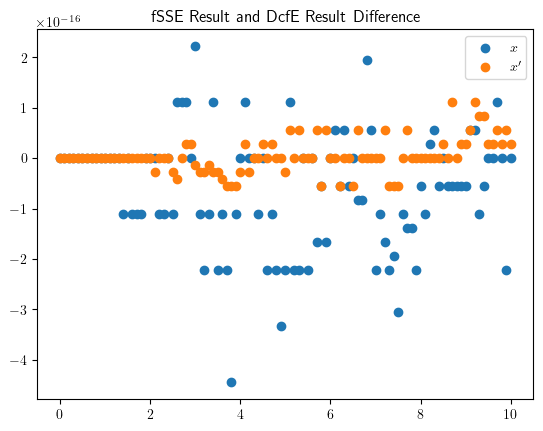

In [13]:
plt.scatter(np.arange(0, TotalTime + dt, dt), theta_fSSE[:, 0] - theta_DcfE[:, 0])
plt.scatter(np.arange(0, TotalTime + dt, dt), theta_fSSE[:, 1] - theta_DcfE[:, 1])
plt.legend(("$x$","$x'$"))
plt.title("fSSE Result and DcfE Result Difference")
plt.show()


对比离散化与ode求解结果

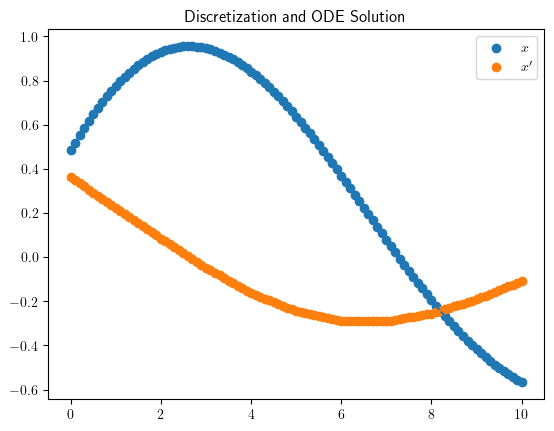

In [14]:
plt.scatter(np.arange(0, TotalTime + dt, dt), theta_fSSE[:, 0])
plt.scatter(np.arange(0, TotalTime + dt, dt), theta_fSSE[:, 1])
plt.plot(np.arange(0, TotalTime + 0.01, 0.01), theta_total)
plt.legend(("$x$", "$x'$"))
plt.title("Discretization and ODE Solution")
plt.show()


画$\frac{d \vec{\theta}}{d T} = \frac{d \Psi}{d T} \vec{\theta}_{0}$的时程曲线

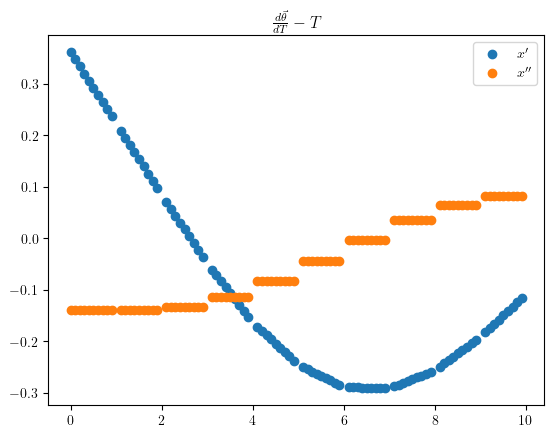

In [15]:
# 初始化，把0时刻也画了
theta_derivative_NoInteger_fSSE = np.array(
    [[theta_total[0, 1], -p * theta_total[0, 0] - d * theta_total[0, 1]]]
).reshape((1, -1))

time_plot_discrete = [0]

for i in np.arange(dt, TotalTime + dt, dt):
    # 不画整数点情况
    if i % 1 > 1e-8:
        temp = PsiProperty(i, p, d, np.identity(2))
        theta_derivative_NoInteger_fSSE = np.concatenate(
            (
                theta_derivative_NoInteger_fSSE,
                (
                    temp.Psi_Derivative_Value_fSSE() @ theta_fSSE[0, :].reshape((-1, 1))
                ).T,
            ),
            axis=0,
        )
        time_plot_discrete = time_plot_discrete + [i]
time_plot_discrete = np.array(time_plot_discrete)

plt.scatter(time_plot_discrete, theta_derivative_NoInteger_fSSE[:, 0])
plt.scatter(time_plot_discrete, theta_derivative_NoInteger_fSSE[:, 1])
plt.legend(("$x'$", "$x''$"))
plt.title(r"$\frac{d\vec{\theta}}{dT} - T$")
plt.show()


画整数点处的左右导数

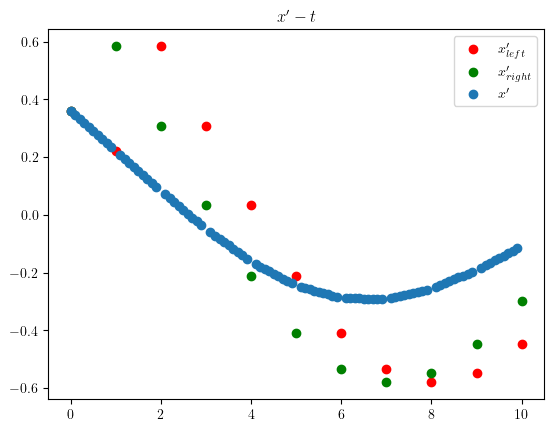

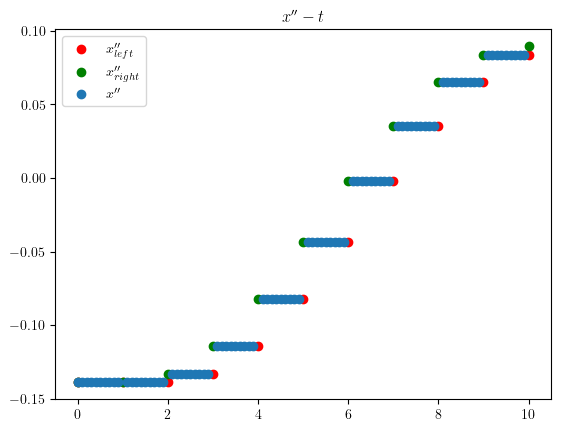

In [16]:
theta_derivative_Integer_Left_fSSE = np.array(
    [[theta_total[0, 1], -p * theta_total[0, 0] - d * theta_total[0, 1]]]
).reshape((1, -1))
theta_derivative_Integer_Right_fSSE = np.array(
    [[theta_total[0, 1], -p * theta_total[0, 0] - d * theta_total[0, 1]]]
).reshape((1, -1))


time_plot_discrete_integer = [0]
for i in np.arange(1, TotalTime + 1, 1):
    # 画整数点左导数情况
    temp = PsiProperty(i, p, d, np.identity(2))
    theta_derivative_Integer_Left_fSSE = np.concatenate(
        (
            theta_derivative_Integer_Left_fSSE,
            (
                temp.Psi_Derivative_Value_Integer_Left_fSSE()
                @ theta_fSSE[0, :].reshape((-1, 1))
            ).T,
        ),
        axis=0,
    )
    theta_derivative_Integer_Right_fSSE = np.concatenate(
        (
            theta_derivative_Integer_Right_fSSE,
            (
                temp.Psi_Derivative_Value_Integer_Right_fSSE()
                @ theta_fSSE[0, :].reshape((-1, 1))
            ).T,
        ),
        axis=0,
    )
    time_plot_discrete_integer = time_plot_discrete_integer + [i]

time_plot_discrete_integer = np.array(time_plot_discrete_integer)

plt.scatter(
    time_plot_discrete_integer, theta_derivative_Integer_Left_fSSE[:, 0], c="Red"
)
plt.scatter(
    time_plot_discrete_integer, theta_derivative_Integer_Right_fSSE[:, 0], c="Green"
)
plt.scatter(time_plot_discrete, theta_derivative_NoInteger_fSSE[:, 0])
plt.title("$x' - t$")
plt.legend(("$x'_{left}$","$x'_{right}$","$x'$"))
plt.show()

plt.scatter(
    time_plot_discrete_integer, theta_derivative_Integer_Left_fSSE[:, 1], c="Red"
)
plt.scatter(
    time_plot_discrete_integer, theta_derivative_Integer_Right_fSSE[:, 1], c="Green"
)
plt.scatter(time_plot_discrete, theta_derivative_NoInteger_fSSE[:, 1])
plt.title("$x'' - t$")
plt.legend(("$x''_{left}$","$x''_{right}$","$x''$"))
plt.show()


# 4. 基于CLF设计的指数稳定性

定义二次型形式的CLF函数：

$$
V = \vec{\theta}^{\top} H \vec{\theta} \geq 0,
$$

其中$H$是对称的正定矩阵。

显然，$\frac{dV}{dT} \leq 0$与$\frac{dV}{dt} \leq 0$等价，后面在时间尺度$T$上作进一步分析。

稳定性的充分条件为，能找到$\{ p_{i} \}$和$\{ d_{i} \}$组合，使得

$$
\frac{dV}{dT} \leq 0, \qquad n \in \mathbb{N},
$$

设计CLF函数，引入参数$\lambda_{t}$，要求求解$\{ p_{i} \}$和$\{ d_{i} \}$的取值范围，使得对于$n \in \mathbb{N}$，有：

$$
\frac{dV \bigg(\vec{p}, \vec{d} \bigg)}{dt} + \lambda_{t} V \bigg(\vec{p}, \vec{d} \bigg) \leq 0.
$$

转到时间尺度$T$，有：

$$
\frac{dV \bigg(\vec{p}, \vec{d} \bigg)}{dT} + \lambda V \bigg(\vec{p}, \vec{d} \bigg) \leq 0,
$$

其中，

$$
\lambda = \frac{\lambda_{t}}{\tau}.
$$


在前两节中，我们发现，系统的状态量$\vec{\theta}_{T}$总能表示为如下形式：

$$
\vec{\theta}_{T} = \Psi (T, \vec{p}, \vec{d}) \vec{\theta}_{0}.
$$

其中，$\Psi$是关于新时间尺度下的时间$T$（虽然不一定显含$T$），以及控制增益的函数。

因此，可以推导得到：

$$
\begin{aligned}
    \frac{dV}{dT} + \lambda V &= \vec{\theta}^{\top}_{T} H \frac{d\vec{\theta}_{T}}{dT} + \frac{d\vec{\theta}_{T}^{\top}}{dT} H \vec{\theta}^{\top}_{T} + \lambda \vec{\theta}^{\top}_{T} H \vec{\theta}_{T} \\
    & = \vec{\theta}^{\top}_{0} \Psi^{\top} H \frac{d\Psi}{dT} \vec{\theta}_{0} + \vec{\theta}^{\top}_{0} \bigg(\frac{d\Psi}{dT} \bigg)^{\top} H \Psi \vec{\theta}_{0} + \vec{\theta}^{\top}_{0} \Psi^{\top} \bigg(\lambda H \bigg) \Psi \vec{\theta}_{0} \\
    &= \vec{\theta}^{\top}_{0} \underbrace{\bigg[\Psi^{\top} H \frac{d\Psi}{dT} + \bigg(\frac{d\Psi}{dT} \bigg)^{\top} H \Psi + \Psi^{\top} \bigg(\lambda H \bigg) \Psi \bigg]}_{\Phi (T, \vec{p}, \vec{d})} \vec{\theta}_{0} \leq 0.
\end{aligned}
$$

类似于一个**LMI**（线性矩阵不等式）问题。要得到$(\vec{p}, \vec{d})$的范围，使得对于$T$属于某一区间$(T_{\mathrm{StartConverge}}, + \infty)$时，$\Phi$恒（半）负定。


由于$H$对称，因此，

$$
\Phi = \Psi^{\top} H \frac{d\Psi}{dT} + \bigg(\frac{d\Psi}{dT} \bigg)^{\top} H \Psi + \Psi^{\top} \bigg(\lambda H \bigg) \Psi \\
\Rightarrow \Phi^{\top} = \bigg(\frac{d\Psi}{dT} \bigg)^{\top} H \Psi + \Psi^{\top} H \frac{d\Psi}{dT} + \Psi^{\top} \bigg(\lambda H \bigg) \Psi = \Phi.
$$

可见，$\Phi(T, \vec{p}, \vec{d})$也是**对称**的。


要证明对称矩阵的正定性，主要有如下两种思路。详见下表：

|   判别方法    |      计算复杂度      |
|:-----------:|:--------------------:|
|    特征值     | $\mathcal{O}(n^{4})$ |
| Sylvester判据 | $\mathcal{O}(n^{4})$ |

Sylvester判据：
对于一个方阵$A$，若其顺序主子式$A[:n,:n]$的行列式都大于0，则$A$正定；若顺序主子式的行列式在奇数时小于0，偶数时大于0，则$A$负定。


这里定义一个类，把两种方法都放进去，默认使用Sylvester判据：


In [9]:
class MatrixDefinitenessChecker:
    def __init__(self, matrix, method="sylvester", tol=1e-8):
        """
        MatrixDefinitenessChecker 类的构造函数

        参数：
        - matrix: numpy.array变量,表示待判断的矩阵
        - method: str变量,判断方法,可选值为 'eigenvalues' 或 'sylvester'，默认为 'sylvester'
        - tol: float变量,放松判断条件
        """
        self.matrix = matrix
        self.n = matrix.shape[0]
        self.method = method.lower()
        self.tol = tol

    def is_Match(self):
        if self.method == "eigenvalues":
            return self.is_eigenvalues_match()
        elif self.method == "sylvester":
            return self.is_sylvester_match()
        else:
            raise ValueError(
                "Invalid method. Choose from 'eigenvalues' or 'sylvester'."
            )

    def is_eigenvalues_match(self):
        eigvals, _ = np.linalg.eig(self.matrix)
        return all(eigvals <= self.tol)

    def get_order_wise_determinants(self):
        """
        获取方阵的顺序主子式的行列式
        :param matrix: 输入的方阵
        :return: 返回一个数组，包含每个顺序主子式的行列式
        """
        n = len(self.matrix)
        det_list = []
        for k in range(1, n + 1):
            submatrix = self.matrix[:k, :k]  # 提取顺序主子式
            determinant = np.linalg.det(submatrix)  # 计算行列式
            det_list.append(determinant)
        return det_list

    def is_sylvester_match(self):
        """
        通过Sylvester判据检查方阵是否(半)负定
        :param tol: 容差值,默认为1e-8
        :return: 如果行列式为0(容差值范围内),则如果前n-1个元素中
        ,奇数位元素小于等于0,且偶数位元素大于等于0,则返回True,否则
        返回False;如果行列式不为0,则如果奇数位元素小于0,且偶数位元
        素大于0,则返回True,否则返回False
        """
        DetList = self.get_order_wise_determinants()
        n = len(DetList)

        if DetList[-1] <= self.tol:  # 判断是否半负定
            odd_indices = range(0, n - 1, 2)
            even_indices = range(1, n - 1, 2)

            checker_1 = all(DetList[i] <= 0 for i in odd_indices)
            checker_2 = all(DetList[i] >= 0 for i in even_indices)

        else:  # 判断是否负定
            odd_indices = range(0, n, 2)
            even_indices = range(1, n, 2)

            checker_1 = all(DetList[i] < 0 for i in odd_indices)
            checker_2 = all(DetList[i] > 0 for i in even_indices)

        return checker_1 and checker_2


Sylvester判据判断正定性示例

In [10]:
A= np.array([
    [1,0,0,0],
    [0,2,0,0],
    [0,0,0,0],
    [0,0,0,-1]
])

B=np.array([
    [-1,0,0,0],
    [0,-2,0,0],
    [0,0,-3,0],
    [0,0,0,-4]
])

C=np.array([
    [-1,0,0,0],
    [0,0,0,0],
    [0,0,-3,0],
    [0,0,0,-4]
])

temp1=MatrixDefinitenessChecker(A)
temp2=MatrixDefinitenessChecker(B)
temp3=MatrixDefinitenessChecker(C)

print(temp1.is_Match(),temp2.is_Match(),temp3.is_Match())


False True True
